In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')


In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.shape

(10002, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

**Since there is only few missing value in entire dataset that's too in certain rows, we will drop these rows.**

In [6]:
df = df.dropna()

In [7]:
df.shape

(9998, 14)

**Drop irrelavant columns**

In [8]:
df = df.drop(columns=['RowNumber', 'CustomerId','Surname'])

# EDA

## Customer Exit Distribution

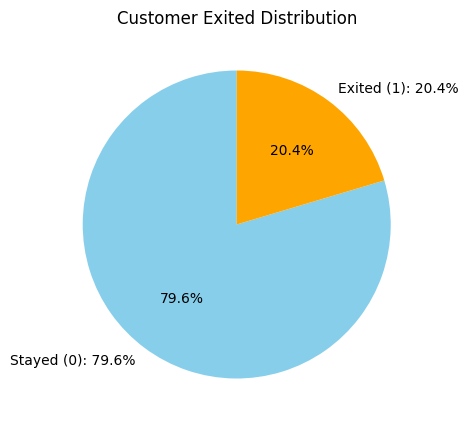

In [9]:
import matplotlib.pyplot as plt

exit_counts = df['Exited'].value_counts()
exit_percentages = df['Exited'].value_counts(normalize=True) * 100

labels = [f'Stayed (0): {exit_percentages[0]:.1f}%', f'Exited (1): {exit_percentages[1]:.1f}%']

plt.figure(figsize=(5, 5))
plt.pie(exit_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Customer Exited Distribution")
plt.show()


**Intrepretation:** Data is imbalanced.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

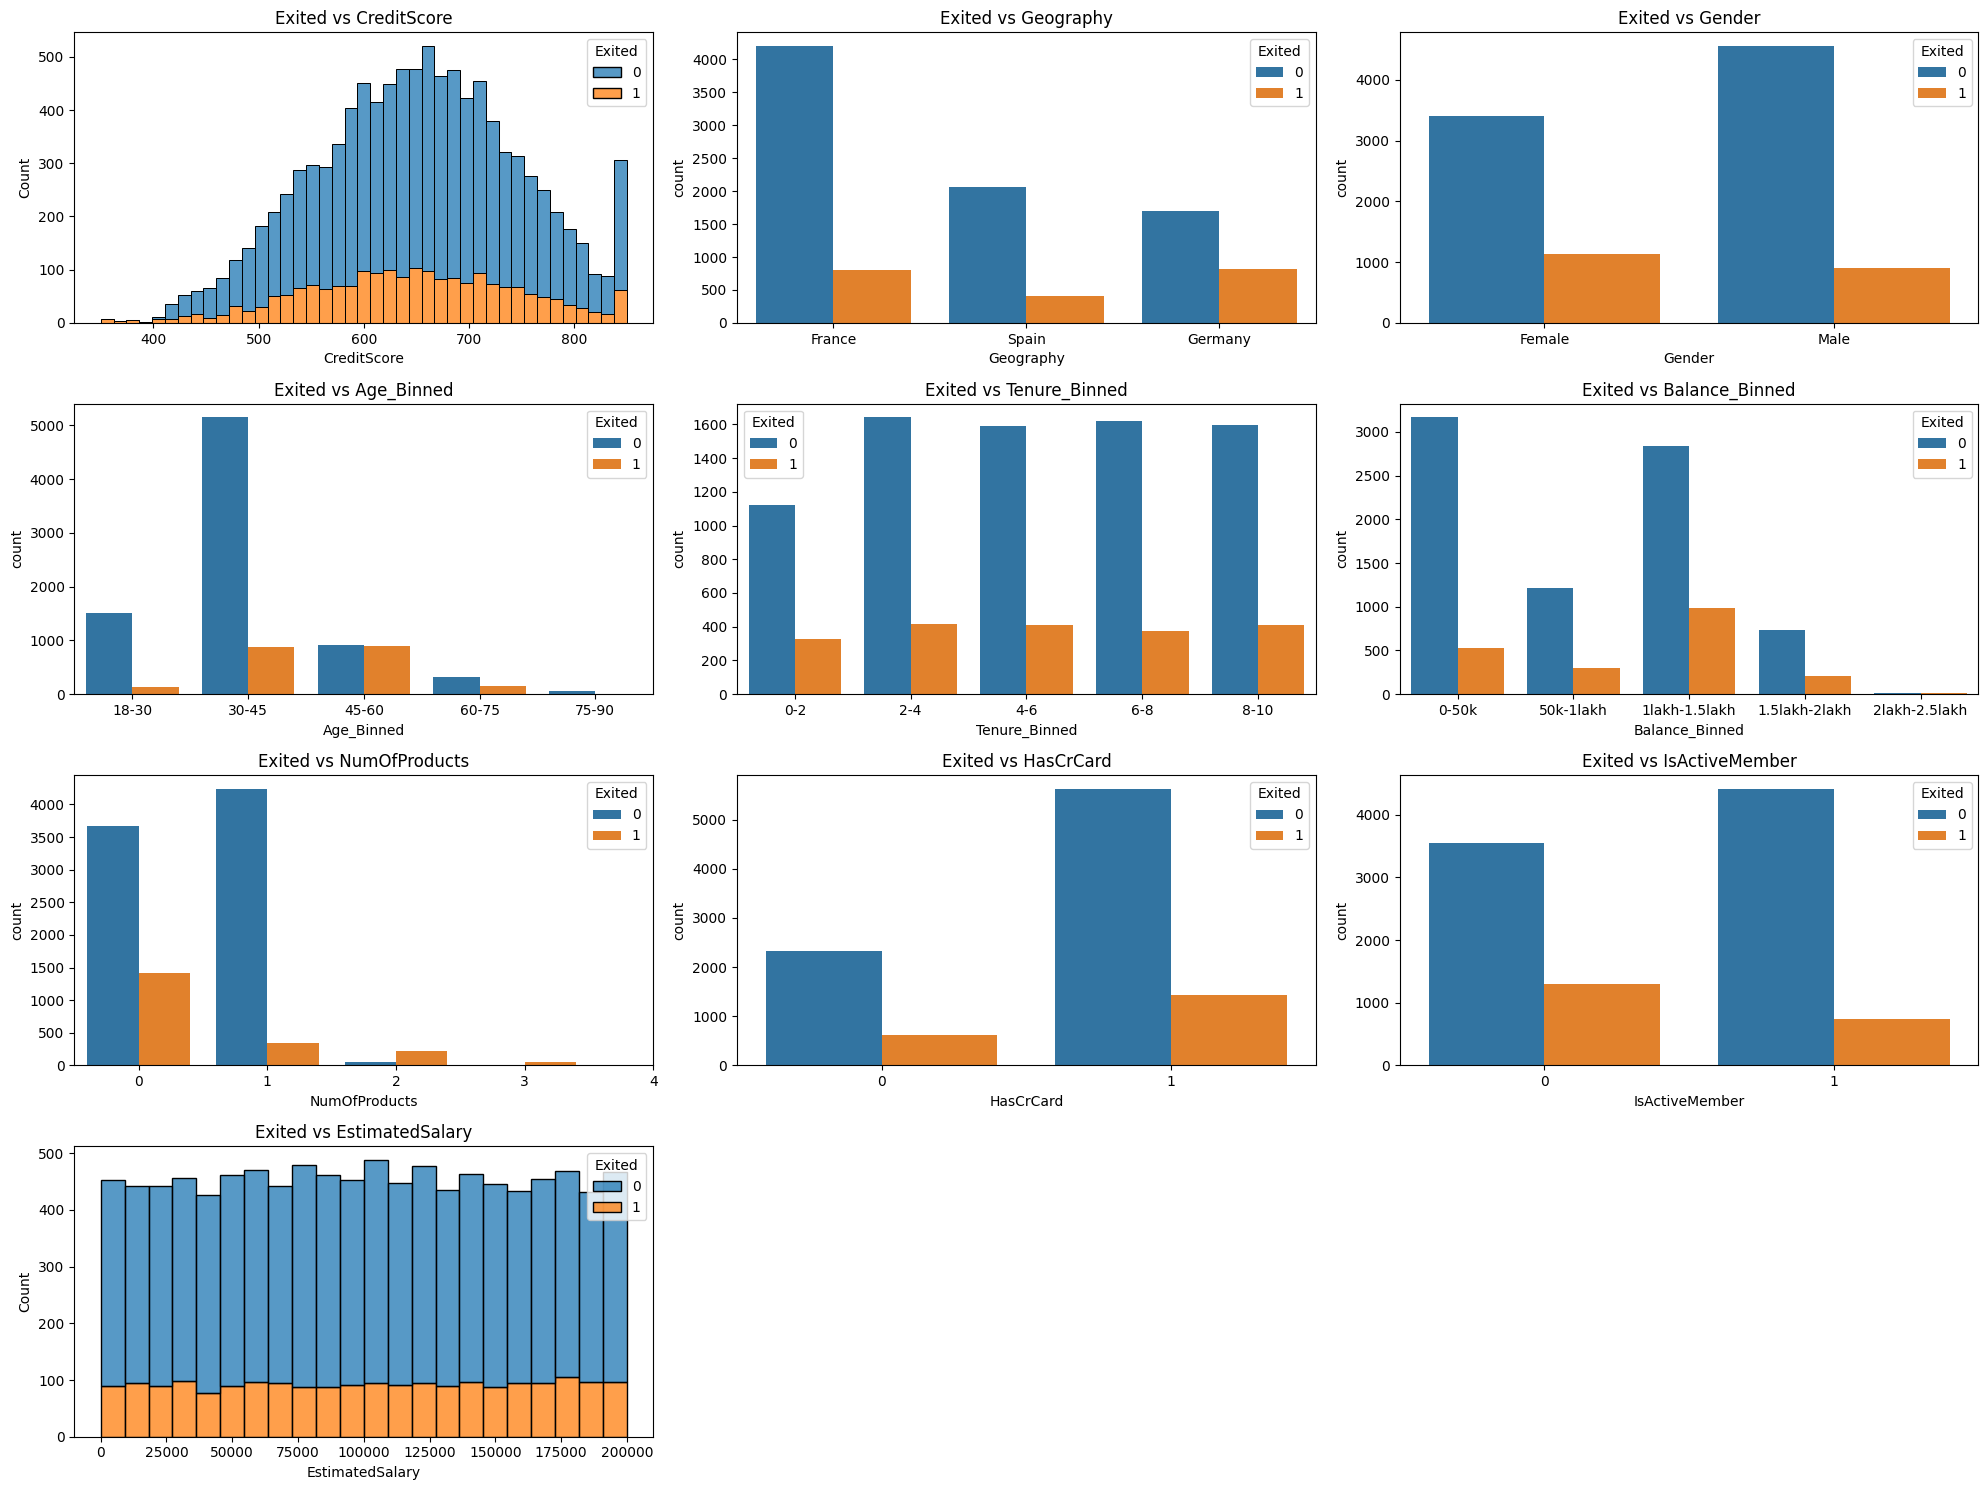

In [10]:
import seaborn as sns

age_bins = [18,30,45,60,75,90]
age_labels = ['18-30','30-45','45-60','60-75','75-90']
df["Age_Binned"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)


Tenure_bins = [0,2,4,6,8,10]
Tenure_labels = ['0-2','2-4','4-6','6-8','8-10']
df["Tenure_Binned"] = pd.cut(df["Tenure"], bins=Tenure_bins, labels=Tenure_labels, right=False)


Balance_bins = [0,50000,100000,150000,200000,250000]
Balance_labels = ["0-50k", "50k-1lakh", "1lakh-1.5lakh", "1.5lakh-2lakh", "2lakh-2.5lakh"]
df["Balance_Binned"] = pd.cut(df["Balance"], bins=Balance_bins, labels=Balance_labels, right=False)


relevant_vars = ["CreditScore", "Geography", "Gender", "Age_Binned", "Tenure_Binned", "Balance_Binned", 
                 "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, var in enumerate(relevant_vars):
    if var == "HasCrCard":
        sns.countplot(data=df, x=var, hue="Exited", ax=axes[i])
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(["0", "1"])
    elif var == "NumOfProducts":
        sns.countplot(data=df, x=var, hue="Exited", ax=axes[i])
        axes[i].set_xticks(range(5))
        axes[i].set_xticklabels([0, 1, 2, 3, 4])
    elif var == "IsActiveMember":
        sns.countplot(data=df, x=var, hue="Exited", ax=axes[i])
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(["0", "1"])
    elif var in ["Age_Binned", "Tenure_Binned", "Balance_Binned", "Geography", "Gender"]:
        sns.countplot(data=df, x=var, hue="Exited", ax=axes[i])
    else:
        sns.histplot(data=df, x=var, hue="Exited", multiple="stack", kde=False, ax=axes[i])
    axes[i].set_title(f"Exited vs {var}")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




**General Interpretation from Visualization**
1. As NumOfProducts increases, number of customers exited decreases.
2. Exit rate is high among females compared to males, suggesting bank needs to have policy which will help to retain female customers.
3. Exit rate is high among inactive member compared to active members.
4. Exit rate is high among  member having credit card rather than  members not having credit card.
5. As credit score improves, exit rate decrease.
6. Germany has highest no. of members exiting compared to other locations.
7. Customers within age group of 45-60 has highest exit rate(around 50%) among all age bins.
8. No specific trend observed from salary,Trend.

**Dropped binned columns**

In [11]:
binned_columns = ["Age_Binned", "Tenure_Binned", "Balance_Binned"]
df = df.drop(columns = binned_columns)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


# Feature Selection & Engineering

## **Correlation analysis**

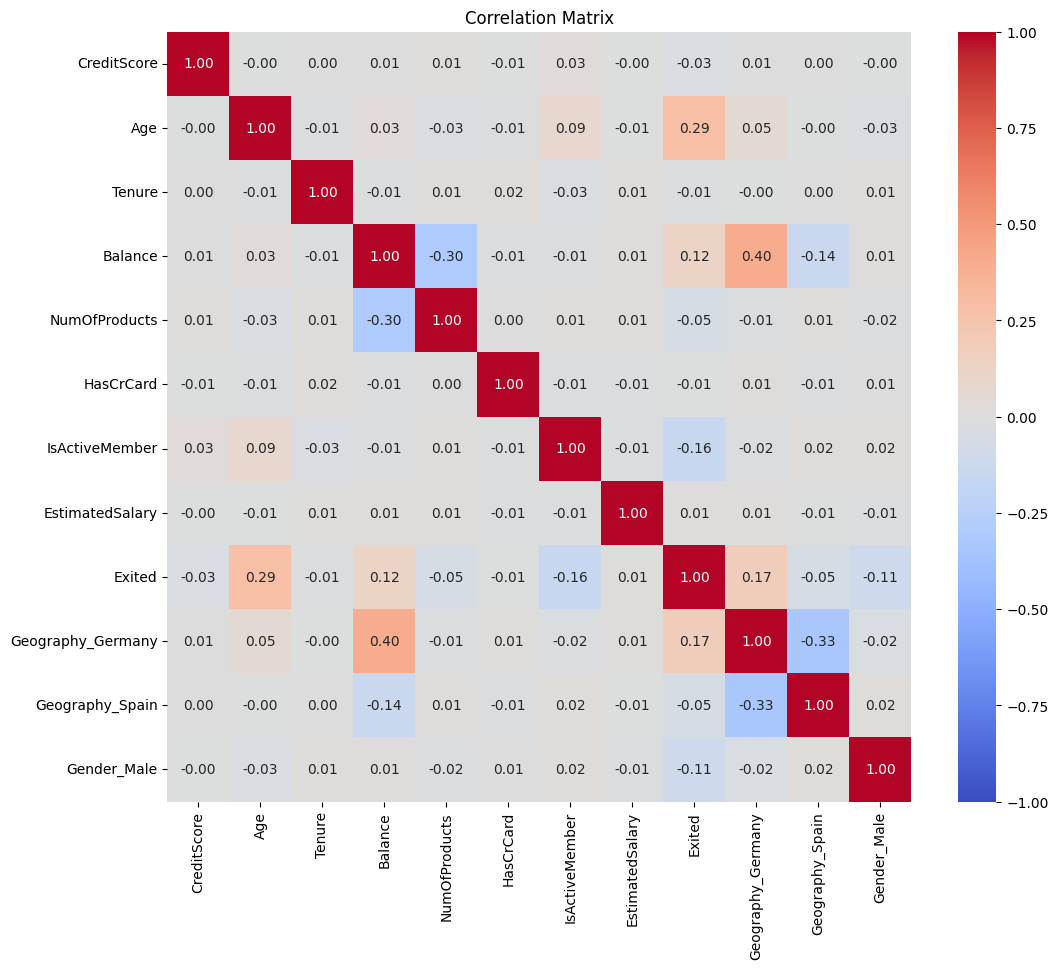

In [12]:
df_encoded = pd.get_dummies(df,columns= ['Geography','Gender'], drop_first = True)

numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", 
                     "IsActiveMember", "EstimatedSalary", "Exited"] + list(df_encoded.columns[-3:])

correlation_matrix = df_encoded[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

Correlation analysis help to find linear relationship between different set of variables. Since none of the features has strong or moderate correlation with target variable exit we will go for feature selection

## **Feature selection Using XGBoost**



              Feature  Importance
1                 Age    0.239951
0         CreditScore    0.145867
7     EstimatedSalary    0.145320
3             Balance    0.141928
4       NumOfProducts    0.127165
2              Tenure    0.081163
6      IsActiveMember    0.040977
8   Geography_Germany    0.027869
5           HasCrCard    0.018721
10        Gender_Male    0.018306
9     Geography_Spain    0.012733


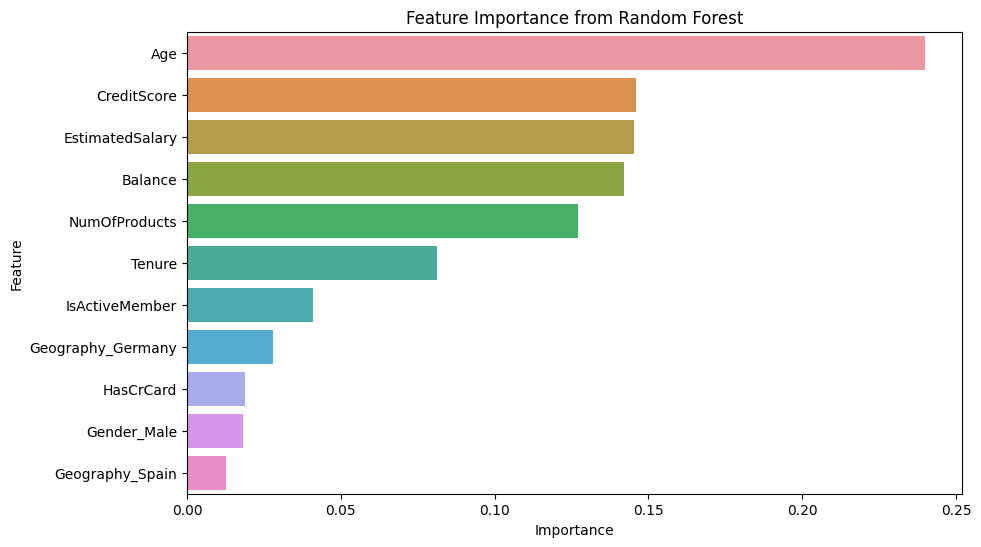

In [13]:
 from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example DataFrame
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Prepare features and target
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Top 5 Features contributing to Exit : Age, CreditScore,EstimatedSalary, Balance and NumOfProducts.**

# Customer Segmentation Using Clustering

### **k-nearest neighbors (kNN)**  

## Finding Elbow point for kNN

**The elbow method is a technique used to determine the optimal number of clusters in clustering algorithms like K-Means.**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

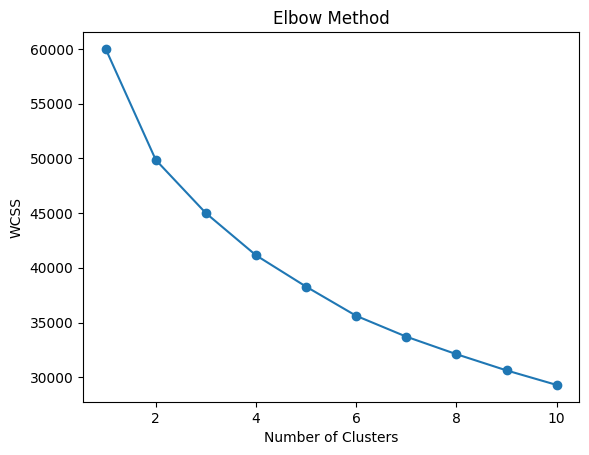

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



features = ['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','Tenure']
X = df[features].dropna()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Elbow method top find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss,marker ='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

### **K Means Neighbor**

It’s the point on the graph where the rate of decrease of WCSS slows down. This is where you should choose the optimal number of clusters, from baove it is visible that elbow point for data is 2.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


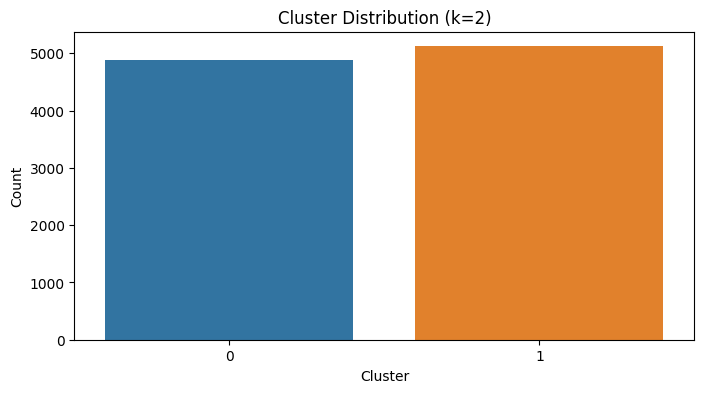

Cluster Centers:
    CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0     0.009534  0.026363 -0.011950  0.749646      -0.289299   0.002842   
1    -0.009058 -0.025046  0.011353 -0.712215       0.274854  -0.002700   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0       -0.035986         0.011073           0.609395        -0.538536   
1        0.034189        -0.010520          -0.578967         0.511646   

   Gender_Male  
0    -0.006458  
1     0.006135  

Cluster Analysis:
   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0     0.009534  0.026363 -0.011950  0.749646      -0.289299   0.002842   
1    -0.009058 -0.025046  0.011353 -0.712215       0.274854  -0.002700   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0       -0.035986         0.011073           0.609395        -0.538536   
1        0.034189        -0.010520          -0.578967         0.511646   

   Gender_Male  Clus

In [15]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=['Exited'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution (k=2)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers:\n", cluster_centers)

cluster_analysis = cluster_centers.copy()
cluster_analysis['Cluster'] = cluster_analysis.index

print("\nCluster Analysis:")
print(cluster_analysis)


## **Cluster Summary**

**Creditscore:**  
- Cluster 0 has a slightly lower credit score compared to Cluster 1, which might suggest that customers in Cluster 0 have slightly worse credit profiles.  
- Cluster 1 has a higher credit score, possibly indicating better financial health.

**Age:**  
- Cluster 1 has a slightly higher average age, suggesting that customers in this cluster may be older.

**Tenure:**  
- Cluster 0 shows a slightly higher tenure, implying that these customers have been with the bank for a longer duration.

**Balance:**  
- Cluster 0 has a much lower balance compared to Cluster 1, indicating that customers in Cluster 1 tend to have higher balances in their accounts.

**NumOfProducts:**  
- Cluster 1 has a higher number of products, suggesting that these customers engage with more of the bank’s offerings.

**HasCrCard:**  
- Both clusters have similar values for `HasCrCard`, indicating that credit card ownership is fairly balanced between the two clusters.

**IsActiveMember:**  
- Cluster 0 has a higher proportion of active members, which suggests that these customers are more engaged with the bank.

**EstimatedSalary:**  
- Cluster 1 has a slightly higher average salary, suggesting that the customers in this group may have higher incomes.

**Geography:**  
- Cluster 0 has higher values for `Geography_Germany`, indicating that these customers are predominantly from Germany.  
- Cluster 1 has higher values for `Geography_Spain`, suggesting that customers in this cluster are mainly from Spain.

**Gender_Male:**  
- Cluster 1 has a higher proportion of male customers compared to Cluster 0, with 1 indicating male and 0 indicating female.

---

## **Business Interpretation:**

### **Cluster 0:**  
- **Profile:** Customers in this cluster are likely to be older, wealthier, have lower balances, and have been with the bank longer. They are more active in Germany and may have fewer products.  
- **Targeting Strategy:** These customers could be ideal for high-value, premium services.
  
### **Marketing Campaign Ideas for Cluster 0:**
- **Premium Savings Plans:** Offer high-yield savings accounts or investment opportunities to retain their balances.
- **Cross-Selling:** Introduce complementary financial products, such as credit cards or loans, to increase the number of products per customer.
- **Engagement Programs:** Design loyalty or rewards programs specifically for less active members to boost engagement.
- **Localized Campaigns in Germany:** Tailor offers specifically for customers in Germany, such as regional financial services or language-specific campaigns.

### **Product Recommendations for Cluster 0:**
- Low-risk investment products or premium savings accounts.
- Credit cards with cashback or rewards programs to encourage more active usage.

---

### **Cluster 1:**  
- **Profile:** Customers in this cluster are younger, more affluent, have more products, and tend to have higher balances. They are more active and engaged in Spain, making them more adaptable and tech-savvy.  

### **Marketing Campaign Ideas for Cluster 1:**
- **Affordable Loan Offers:** Provide small personal loans or micro-credit products tailored to younger customers with lower balances.
- **Retention Campaigns:** Offer personalized offers or discounts to maintain relationships with these highly active customers.
- **Localized Campaigns in Spain:** Develop campaigns emphasizing products and services specific to Spain.
- **Bundling of Services:** Provide bundled packages for services (e.g., savings accounts + credit cards) to maintain the high number of products per customer.

### **Product Recommendations for Cluster 1:**
- Low-cost credit products or microfinance options.
- Budget-friendly financial planning services or tools.
- Promotions for digital banking services to encourage regular transactions.


## Visualize Cluster Centers

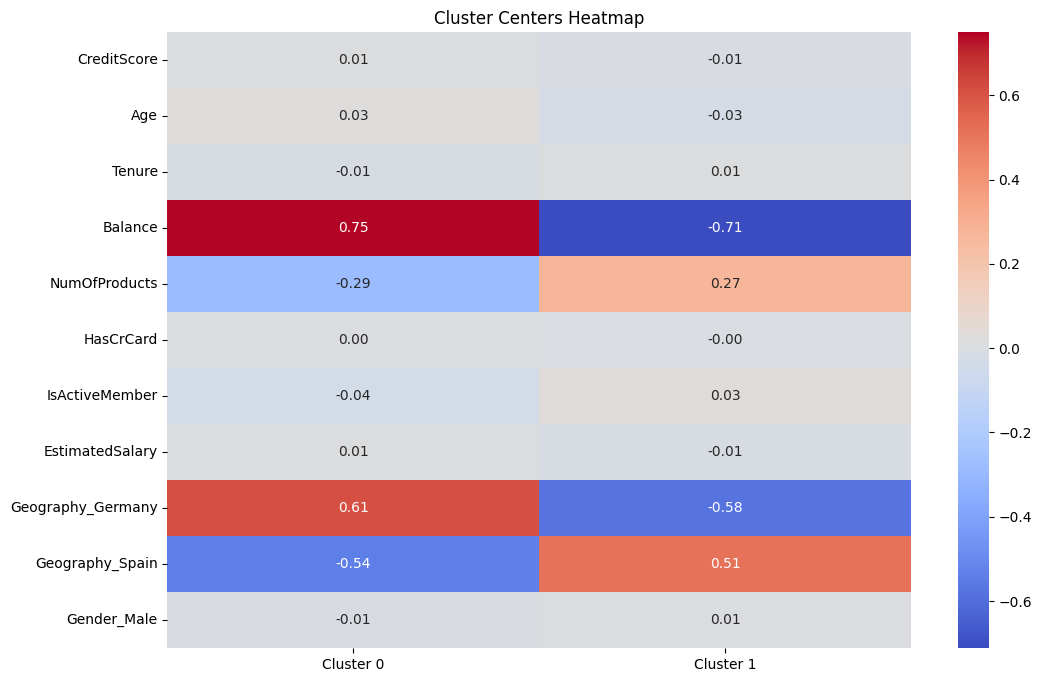

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers.T, cmap='coolwarm', annot=True, cbar=True, fmt=".2f", xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=X.columns)
plt.title('Cluster Centers Heatmap')
plt.show()


# Outlier Detection

### **Finding Outliers using K-Means**

In [17]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, distances = pairwise_distances_argmin_min(X_scaled, kmeans.cluster_centers_)

threshold = np.mean(distances) + 2 * np.std(distances)

outliers_indices = np.where(distances > threshold)[0]
outliers = pd.DataFrame(X_scaled[outliers_indices], columns=X.columns)

y = df['Exited'] 
outliers['Exited'] = y.iloc[outliers_indices].values

outliers_file = '/kaggle/working/kmeans_outliers_with_exited.xlsx'
outliers.to_excel(outliers_file, index=False)

print("Headers and Top 5 Rows of Outliers:")
print(outliers.head())

print("\nOutliers saved to:", outliers_file)


Headers and Top 5 Rows of Outliers:
   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -2.841093 -0.945919 -0.350277  0.618131       4.246257   0.646028   
1    -1.443985  2.582104 -0.350277 -1.225860      -0.911570   0.646028   
2     0.905227  1.819288 -1.041838  0.917838       4.246257   0.646028   
3     0.015217  3.440271  1.724407 -1.225860       0.807705   0.646028   
4    -1.402589 -0.373807  1.724407  1.599493      -0.911570  -1.547921   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0       -1.030057         0.334685           1.727214        -0.573731   
1       -1.030057        -1.712050          -0.578967         1.742976   
2       -1.030057        -1.247233           1.727214        -0.573731   
3        0.970820         0.253459          -0.578967         1.742976   
4        0.970820         0.368261          -0.578967         1.742976   

   Gender_Male  Exited  
0    -1.095787       1  
1    -1.095787       1  

**There are 121 outliers identified using the above method. The outliers can be further analysed to frame suitable policy for customer retention.** 

# Modelling

##  Modelling using Logistic Regression,SVM and XGBoost after SMOTEEIN

In [18]:
# Necessary imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pandas as pd

# Assuming df is your dataframe with already created dummy variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


# Define features (X) and target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE + Edited Nearest Neighbors (SMOTEENN)
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

# --- Logistic Regression ---
# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict probabilities on the test set
y_pred_probs_lr = lr_model.predict_proba(X_test)[:, 1]

# AUC-ROC Score and Classification Report for Logistic Regression
auc_score_lr = roc_auc_score(y_test, y_pred_probs_lr)
print(f"AUC-ROC Score after SMOTEENN (Logistic Regression): {auc_score_lr}")
print("Classification Report (Logistic Regression):\n", classification_report(y_test, lr_model.predict(X_test)))


# --- Support Vector Machine (SVM) ---
# Train SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict probabilities on the test set
y_pred_probs_svm = svm_model.predict_proba(X_test)[:, 1]

# AUC-ROC Score and Classification Report for SVM
auc_score_svm = roc_auc_score(y_test, y_pred_probs_svm)
print(f"AUC-ROC Score after SMOTEENN (SVM): {auc_score_svm}")
print("Classification Report (SVM):\n", classification_report(y_test, svm_model.predict(X_test)))


# --- XGBoost ---
# Train XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict probabilities on the test set
y_pred_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# AUC-ROC Score and Classification Report for XGBoost
auc_score_xgb = roc_auc_score(y_test, y_pred_probs_xgb)
print(f"AUC-ROC Score after SMOTEENN (XGBoost): {auc_score_xgb}")
print("Classification Report (XGBoost):\n", classification_report(y_test, xgb_model.predict(X_test)))


# --- Random Forest ---
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict probabilities on the test set
y_pred_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# AUC-ROC Score and Classification Report for Random Forest
auc_score_rf = roc_auc_score(y_test, y_pred_probs_rf)
print(f"AUC-ROC Score after SMOTEENN (Random Forest): {auc_score_rf}")
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_model.predict(X_test)))


AUC-ROC Score after SMOTEENN (Logistic Regression): 0.768141661316021
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.91      0.64      0.75      1572
           1       0.36      0.76      0.49       428

    accuracy                           0.66      2000
   macro avg       0.64      0.70      0.62      2000
weighted avg       0.79      0.66      0.69      2000

AUC-ROC Score after SMOTEENN (SVM): 0.84368906209127
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.93      0.75      0.83      1572
           1       0.46      0.78      0.58       428

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.77      2000

AUC-ROC Score after SMOTEENN (XGBoost): 0.8532852964257688
Classification Report (XGBoost):
               precision    recall  f1-score   support


**Interpretations:**
1. **XGBoost and Random Forest** performed the best with the highest AUC-ROC scores of 0.8528 and 0.8556, respectively, indicating they are better at distinguishing between the classes compared to Logistic Regression and SVM.

2. **XGBoost and Random Forest** seem to be the most suitable models for this dataset based on the AUC-ROC score and classification report.

### Use SMOTE instaed of SMOTEENN

In [19]:
# Necessary imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE  # Use SMOTE instead of SMOTEENN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pandas as pd


# Define features (X) and target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)  # Changed from SMOTEENN to SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# --- Logistic Regression ---
# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)

# Predict probabilities on the test set
y_pred_probs_lr = lr_model.predict_proba(X_test)[:, 1]

# AUC-ROC Score and Classification Report for Logistic Regression
auc_score_lr = roc_auc_score(y_test, y_pred_probs_lr)
print(f"AUC-ROC Score after SMOTE (Logistic Regression): {auc_score_lr}")
print("Classification Report (Logistic Regression):\n", classification_report(y_test, lr_model.predict(X_test)))


# --- Support Vector Machine (SVM) ---
# Train SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Predict probabilities on the test set
y_pred_probs_svm = svm_model.predict_proba(X_test)[:, 1]

# AUC-ROC Score and Classification Report for SVM
auc_score_svm = roc_auc_score(y_test, y_pred_probs_svm)
print(f"AUC-ROC Score after SMOTE (SVM): {auc_score_svm}")
print("Classification Report (SVM):\n", classification_report(y_test, svm_model.predict(X_test)))


# --- XGBoost ---
# Train XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Predict probabilities on the test set
y_pred_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# AUC-ROC Score and Classification Report for XGBoost
auc_score_xgb = roc_auc_score(y_test, y_pred_probs_xgb)
print(f"AUC-ROC Score after SMOTE (XGBoost): {auc_score_xgb}")
print("Classification Report (XGBoost):\n", classification_report(y_test, xgb_model.predict(X_test)))


# --- Random Forest ---
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predict probabilities on the test set
y_pred_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# AUC-ROC Score and Classification Report for Random Forest
auc_score_rf = roc_auc_score(y_test, y_pred_probs_rf)
print(f"AUC-ROC Score after SMOTE (Random Forest): {auc_score_rf}")
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_model.predict(X_test)))


AUC-ROC Score after SMOTE (Logistic Regression): 0.7705836365365866
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.89      0.72      0.80      1572
           1       0.39      0.66      0.49       428

    accuracy                           0.71      2000
   macro avg       0.64      0.69      0.65      2000
weighted avg       0.78      0.71      0.73      2000

AUC-ROC Score after SMOTE (SVM): 0.8520278946992937
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      1572
           1       0.52      0.72      0.60       428

    accuracy                           0.80      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000

AUC-ROC Score after SMOTE (XGBoost): 0.8529687165584647
Classification Report (XGBoost):
               precision    recall  f1-score   support

     

**Interpretation:Model is giving better resulkt with SMOTE rather than SMOTEENN. XGBoost and Random Forest are performing quite well with the highest accuracy and AUC-ROC scores.**

### Comparison between SMOTE AND SMOTEENN

**Accuracy:** SMOTE consistently provides better accuracy across all models compared to SMOTEENN.

**Precision and Recall:** SMOTE tends to provide better results for both classes, especially in class 1, leading to higher F1-scores and a better balance between precision and recall.

**AUC-ROC Score:** SMOTEENN gives slightly better results in AUC-ROC for most models, but the differences are minimal.

**SMOTE generally provides better performance in terms of accuracy, precision, and recall, making it the preferred choice for improving model performance.**

**SMOTEENN might have a slight advantage in AUC-ROC, but the overall results suggest that SMOTE yields more balanced and reliable results across different evaluation metrics.**







# Customer Churn Reduction due to Model (Random Forest with SMOTE)

### 1. Current Churn Rate:
The current churn rate is **20.4%**.

Total churners before corrective action:
- Total churners = 20.4% × 9998 = 2039.95 ≈ 2040 churners

### 2. Model's Performance:
The model identifies **60%** of the churners (based on recall).

Churners retained:
- Churners retained = 60% × 2040 = 1224 churners retained

Churn reduction:
- Churn reduction = 1224 churners retained

So, **1224 churners** are retained out of the **2040 churners** that would have been lost.

### 3. New Churn Rate:
Remaining churners:
- Remaining churners = 2040 - 1224 = 816 churners remaining

New churn rate:
- New churn rate = (816 / 9998) × 100 = 8.16%

So, after corrective actions, the churn rate would drop from **20.4%** to **8.16%**.

### 4. Financial Impact of Churn Reduction:
If the financial value per customer is ₹1000, you can calculate the savings from retaining these churners:

- Financial impact per customer = ₹1000

Total financial impact:
- Total financial impact = 1224 × ₹1000 = ₹1,224,000

This gives you the financial benefit from the churn reduction, with the churn rate dropping from **20.4%** to **8.16%**.

---

### Summary:
- **Before corrective action**: 2040 churners (churn rate = 20.4%).
- **After corrective action**: 816 churners (churn rate = 8.16%).
- **Churn reduction**: 1224 churners retained.
- The financial impact can be calculated based on customer lifetime value or profit per customer, which will help you assess the value of retaining these 1224 customers, resulting in a financial impact of ₹1,224,000.


# SHAP

AUC-ROC Score after SMOTE (Random Forest): 0.8550316877125396
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1572
           1       0.64      0.60      0.62       428

    accuracy                           0.84      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000



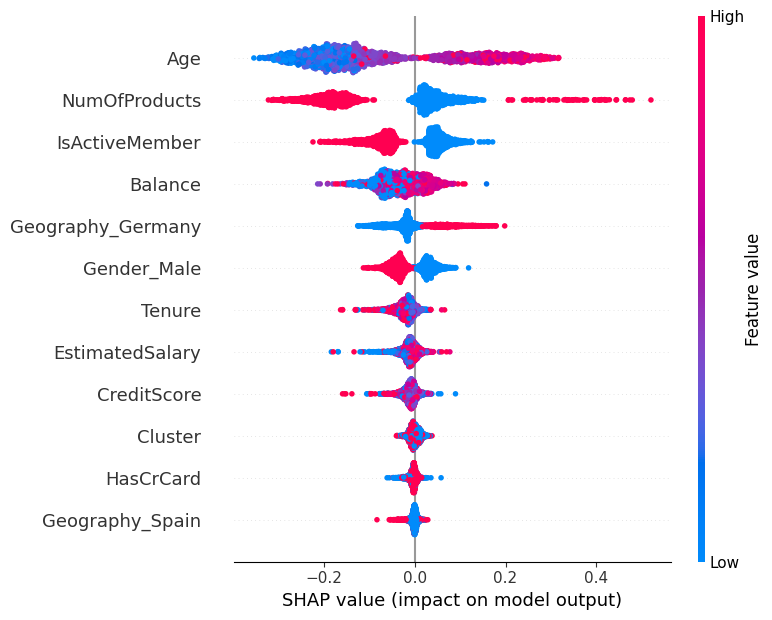

In [20]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predict probabilities on the test set
y_pred_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# AUC-ROC Score and Classification Report for Random Forest
auc_score_rf = roc_auc_score(y_test, y_pred_probs_rf)
print(f"AUC-ROC Score after SMOTE (Random Forest): {auc_score_rf}")
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_model.predict(X_test)))

# --- SHAP Analysis ---
# Ensure X_test is a pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)  # Convert if necessary

explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_df)

# --- Global Explanation (Feature Importance) ---
# Plot summary plot (global explanation)
shap.summary_plot(shap_values[1], X_test_df, feature_names=X.columns)

# --- Local Explanation (Individual Prediction Contribution) ---
shap.initjs()  # This is necessary for displaying plots in Jupyter notebooks

# Generate the force plot for a specific sample
shap.force_plot(
    explainer.expected_value[1],  
    shap_values[1][0],           
    X_test_df.iloc[0],            
    feature_names=X.columns     
)


### Interpretation

**Feature Insights (Global Importance)**

Age: Older customers (higher values) are strongly associated with churn.

NumOfProducts: Customers with fewer products (lower values) are more likely to churn, as indicated by the cluster of red dots on the positive SHAP value side.

IsActiveMember: Active members (higher values in red) are less likely to churn.

Balance: Customers with higher balances have mixed effects, but a significant group (blue) with lower balances is less likely to churn.

Geography_Germany: Being from Germany has a strong positive influence on churn likelihood.

Gender_Male: Male customers tend to have mixed impacts on churn.

HasCrCard: Ownership of a credit card has minimal impact (close to 0 SHAP values).

**Top strategy to reduce customer churn**

1. Target older customers for retention efforts as they are more likely to churn.
   
2. Encourage customers to increase their product holdings, as those with fewer products tend to leave.

3. Focus on activating inactive members to reduce churn further.

**SHAP force (Explanation for individual feature)**

IsActiveMember = -1.03 (Red): This feature significantly increases the prediction towards churn.

NumOfProducts = 0.8077 (Blue): Having more products reduces the likelihood of churn.

Age = -0.6599 (Blue): A lower age contributes to a lower churn probability.

Balance = -1.226 (Blue): A lower balance strongly reduces the churn likelihood.

Tenure = 1.724 (Blue): A longer tenure reduces the likelihood of churn.

Gender_Male = 0.9126 (Blue): Being male contributes slightly to lowering the churn prediction.

This customer has a low churn probability (0.04).


# LIME 

In [21]:
import lime
from lime.lime_tabular import LimeTabularExplainer

X_train_np = X_train
X_test_np = X_test

# Initialize the explainer
explainer = LimeTabularExplainer(
    training_data=X_train_np,  # Training data as NumPy array
    mode='classification',  # Classification problem
    training_labels=y_train.values,  # Training labels as NumPy array
    feature_names=X.columns.tolist(),  # Feature names
    class_names=['Not Exited', 'Exited'],  # Class names for binary classification
    discretize_continuous=True  # Whether to discretize continuous features
)

# Loop over the first 5 instances in X_test
for i in range(1):  # You can change this range to explain more instances
    instance_to_explain = X_test_np[i]  # Choose the i-th instance in X_test
    print(f"Explaining instance {i + 1}...\n")
    
    # Explain the prediction for the chosen instance
    explanation = explainer.explain_instance(instance_to_explain, rf_model.predict_proba)
    
    # Show the explanation for the instance
    explanation.show_in_notebook(show_table=True, show_all=False)


Explaining instance 1...



### **Interpretation**

The model predicts the customer will stay with a 96% probability.

Retention is driven by:

1.Multiple products owned.

2. lower age.
  
3. Lower balance and longer tenure.
 
4. Gender (male).

The primary risk of churn is due to inactive membership and the customer's location (Germany).
